In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pyeeg.spectrum import bin_power
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import tsfresh
import pandas as pd

In [15]:
eeg_splitted_features = np.load('eeg_splitted_features.npy')
eeg_splitted_labels = np.load('eeg_splitted_labels.npy')

In [16]:
# Scale labels between 0 and 1
scaled_labels = MinMaxScaler().fit_transform(eeg_splitted_labels)
valence_labels = scaled_labels[:, 0]
arousal_labels = scaled_labels[:, 1]

In [17]:
electrodes = 'AF3 AF4 F3 F4 F7 F8 FC5 FC6 O1 O2 P7 P8 T7 T8'.split(' ')
sample_rate = 128

In [18]:
eeg_splitted_features.shape

(3219, 14, 1280)

In [19]:
reshaped_features = np.reshape(eeg_splitted_features, [eeg_splitted_features.shape[0]*eeg_splitted_features.shape[1], eeg_splitted_features.shape[2]])
#tsfresh.extract_relevant_features(np.transpose(pd.DataFrame(reshaped_features)), y=arousal_labels)

In [20]:
# Extract power bands
reshaped_features = np.reshape(eeg_splitted_features, [eeg_splitted_features.shape[0]*eeg_splitted_features.shape[1], eeg_splitted_features.shape[2]])
extracted_powers = np.asarray([bin_power(X=feature, Band=[0.5, 3, 7, 10, 30], Fs=sample_rate) for feature in reshaped_features])[:, 0, :]
extracted_powers = np.reshape(extracted_powers, [eeg_splitted_features.shape[0], eeg_splitted_features.shape[1], extracted_powers.shape[1]])

In [21]:
final_features = np.reshape(extracted_powers, [extracted_powers.shape[0], extracted_powers.shape[1]*extracted_powers.shape[2]])


Text(0, 0.5, 'Arousal')

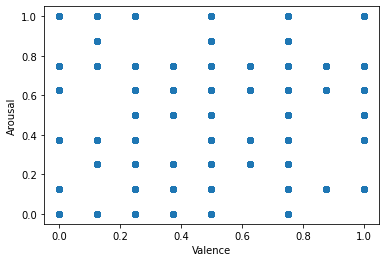

In [22]:
plt.scatter(scaled_labels[:, 0], scaled_labels[:, 1])
plt.xlabel('Valence')
plt.ylabel('Arousal')

In [23]:

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(final_features):
    x_train = final_features[train_index]
    y_train = arousal_labels[train_index]
    x_test = final_features[test_index]
    y_test = arousal_labels[test_index]

    xgb =  XGBRegressor()
    xgb.fit(x_train, y_train)
    
    y_pred = xgb.predict(x_test)
    print(r2_score(y_test, y_pred))

TypeError: split() got an unexpected keyword argument 'shuffle'

In [13]:

kf = KFold(n_splits=10,shuffle=True)
for train_index, test_index in kf.split(final_features):
    x_train = final_features[train_index]
    y_train = valence_labels[train_index]
    x_test = final_features[test_index]
    y_test = valence_labels[test_index]

    xgb =  XGBRegressor()
    xgb.fit(x_train, y_train)
    
    y_pred = xgb.predict(x_test)
    print(r2_score(y_test, y_pred))

-0.01931448891185772
0.217362660741792


KeyboardInterrupt: 